# Optimization Methods

Optimization methods find values that maximize or minimize an objective function, making them useful across disciplines such as engineering, economics, and data science.
Fundamentally, the action principle in physics is an optimization process, where nature selects paths that minimize or extremize an action integral.

## Gradient Descent Methods

Gradient Descent is one of the most widely used optimization techniques, particularly effective for high-dimensional problems in fields such as machine learning.
The method iteratively seeks the minimum of a function by taking steps proportional to the negative of its gradient, guiding the search toward lower function values.
For differentiable objective functions, gradient descent is fundamental in minimizing errors, making it indispensable for training machine learning models and refining physical models in computational astrophysics.

For a function $f(x)$, the gradient $\nabla f(x)$ points in the direction of steepest ascent.
Moving in the opposite direction—along the negative gradient—reduces the function's value. The algorithm updates the parameters iteratively according to:
\begin{align}
x_{n+1} = x_n - \alpha \nabla f(x_n)
\end{align}
where $\alpha$ is the learning rate, controlling the step size.
The choice of $\alpha$ is critical for convergence: 
a large $\alpha$ may cause divergence, where updates overshoot the minimum, while a very small $\alpha$ can lead to slow convergence, requiring many iterations to make meaningful progress.
Proper tuning of $\alpha$ ensures that the algorithm efficiently converges to a minimum without unnecessary oscillations or divergence.

In [3]:
def gd(df, x, alpha, imax=1000):
    for _ in range(imax):
        x -= alpha * df(x)
    return x

In [4]:
# Define the function and its gradient
def f(x):
    return (x - 3)**2 + 4

def df(x):
    return 2 * (x - 3)

# Parameters for gradient descent
x0    = 0.0  # Starting point for optimization
alpha = 0.1

# Run gradient descent
xmin = gd(df, x0, alpha)
print("Approximate minimum:")
print("  xmin  = ",   xmin )
print("f(xmin) = ", f(xmin))

Approximate minimum:
  xmin  =  2.999999999999999
f(xmin) =  4.0


In [5]:
def gd_hist(df, x, alpha, imax=1000):
    X = [x]
    for _ in range(imax):
        X.append(X[-1] - alpha * df(X[-1]))
    return X

-4.553730267517574e+79


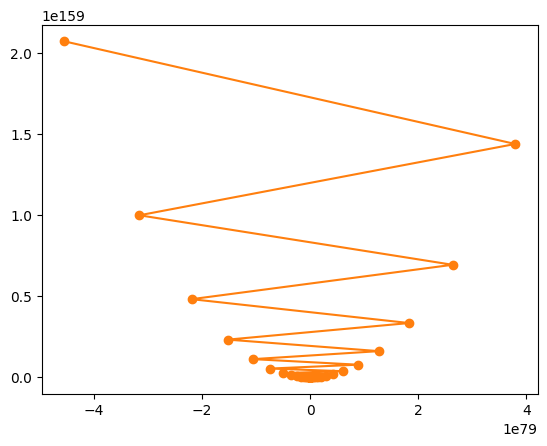

In [6]:
import numpy as np
from matplotlib import pyplot as plt

X = np.linspace(0, 6, 6001)
plt.plot(X, f(X))

alpha = 1.1

X = np.array(gd_hist(df, x0, alpha))
print(X[-1])

plt.plot(X, f(X), '-o')
#plt.xlim(2.5, 3.5)
#plt.ylim(3.95,4.3)

```{exercise}
What will happen if we change the learning rate $\alpha$?

Comment out the plot limits `plt.xlim(2.5, 3.5)` and `plt.ylim(3.95,4.3)` and then try $\alpha = 0.1$, $0.5$, $0.9$, $1.0$, and $1.1$.
```

Similar to our implementation of Newton-Raphson Method, it is possible to employ `JAX` to automatically obtain the derivative.
Here is an updated version of automatic gradient descent.

In [7]:
from jax import grad

def autogd_hist(f, x, alpha, imax=1000):
    df = grad(f)
    X  = [x]
    for _ in range(imax):
        X.append(X[-1] - alpha * df(X[-1]))
    return X

Approximate minimum:
  xmin  =  2.999999761581421
f(xmin) =  4.000000000000057


(3.95, 4.3)

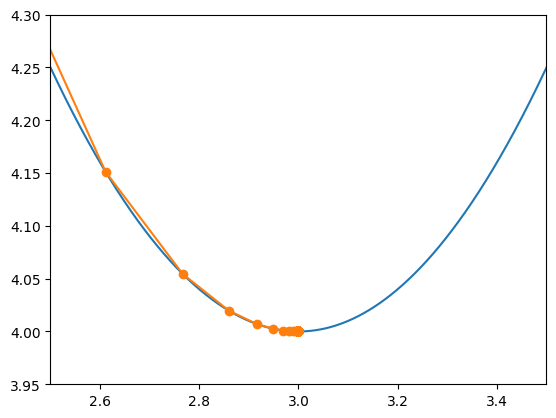

In [8]:
# Define the function and its gradient
def f(x):
    return (x - 3)**2 + 4

# Parameters for gradient descent
x0    = 0.0  # Starting point for optimization
alpha = 0.2

# Run gradient descent
Xmin = np.array(autogd_hist(f, x0, alpha))
print("Approximate minimum:")
print("  xmin  = ",   Xmin[-1] )
print("f(xmin) = ", f(Xmin[-1]))

X = np.linspace(0, 6, 6001)
plt.plot(X,    f(X))
plt.plot(Xmin, f(Xmin), '-o')
plt.xlim(2.5, 3.5)
plt.ylim(3.95,4.3)

## Gradient Descent with JAX for Multiple Dimensions

Multidimensional gradient descent is essential for optimizing functions with multiple parameters, making it the backend of applications such as model fitting and deep learning.

In astrophysics, gradient descent refines models by iteratively adjusting parameters to minimize discrepancies between observed data and theoretical predictions.
For example, in galaxy modeling, each parameter may correspond to a physical property—such as brightness, size, or position—and gradient descent enables efficient optimization to achieve the best fit to observational data.

In deep learning, multidimensional gradient descent is fundamental, as modern neural networks can have millions of parameters.
During training, the algorithm minimizes a loss function that quantifies the difference between the model’s predictions and actual outcomes.
Automatic differentiation with JAX streamlines gradient calculations, allowing practitioners to train complex models without manually computing derivatives.
This capability is particularly valuable for architectures such as convolutional and recurrent neural networks, where gradients must be computed across vast numbers of interconnected parameters.

The following example demonstrates how to use JAX to perform gradient descent on a multivariable function
\begin{align}
f(x, y) = (x - 3)^2 + (y + 4)^2,
\end{align}
where the minimum is at $(x, y) = (3, -4)$.
By tracking each update step, we can visualize the optimization path as it approaches the minimum.

In [9]:
from jax import numpy as jnp
from jax import jit

# Function to perform gradient descent with history tracking
def autogd_hist(f, X, alpha, imax=1000):
    df = jit(grad(f))  # Use JAX to compute gradient
    Xs = [np.array(X)]
    for _ in range(imax):
        Xs.append(Xs[-1] - alpha * df(Xs[-1]))  # Gradient descent update
    return jnp.array(Xs)

Approximate minimum:
  xmin  = [ 2.9999995 -3.9999998]
f(xmin) = 3.410605e-13


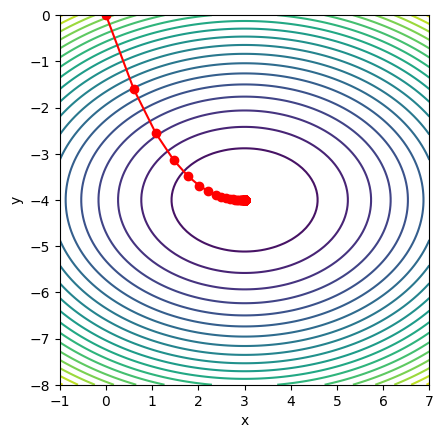

In [10]:
# Define a multivariable function
def f(X):
    x, y = X
    return (x - 3)**2 + 2 * (y + 4)**2

# Parameters for gradient descent
X0    = jnp.array([0.0, 0.0]) # Starting point for optimization
alpha = .1               # Learning rate

# Run gradient descent with history tracking
Xs = autogd_hist(f, X0, alpha)
print("Approximate minimum:")
print("  xmin  =",   Xs[-1] )
print("f(xmin) =", f(Xs[-1]))

# Plot the function and gradient descent path
x_vals = jnp.linspace(-1, 7, 100)
y_vals = jnp.linspace(-8, 0, 100)
X, Y   = jnp.meshgrid(x_vals, y_vals)
Z      = f([X, Y])

plt.contour(X, Y, Z, levels=20)
plt.plot(Xs[:,0], Xs[:,1], '-o', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')

Because we minimize $f(x,y)$, it can be seen as the loss function.
Hence we can plot the evolution of the loss:

Text(0, 0.5, 'Loss f(x,y)')

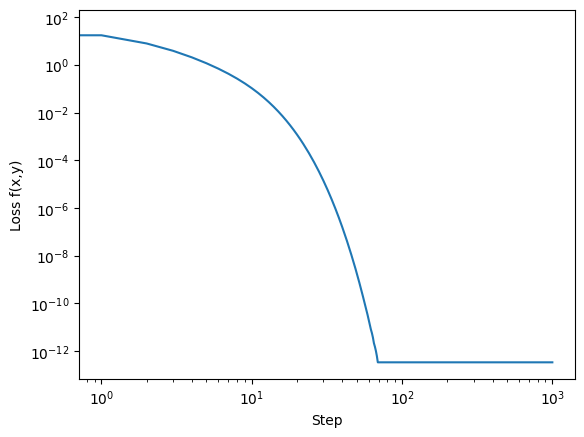

In [11]:
plt.loglog(f(Xs.T))
plt.xlabel('Step')
plt.ylabel('Loss f(x,y)')

To demonstrate a more complex optimization scenario, let's consider fitting a multi-parameter model to noisy data.
We will use polynomial regression as our example, where we fit a polynomial curve to data points by optimizing the coefficients.
This is a non-trivial problem because, as the degree of the polynomial increases, the number of parameters grows, resulting in a high-dimensional optimization task.

In [12]:
groundtruth = np.array([1.2, -3, 0.5, 1.0, -1.8, 2.0, -0.1])

Xdata = np.linspace(-1, 1, 1_000)
Ytrue = sum(c * Xdata**i for i, c in enumerate(groundtruth))
Ydata = Ytrue + np.random.normal(scale=0.1, size=Xdata.shape)

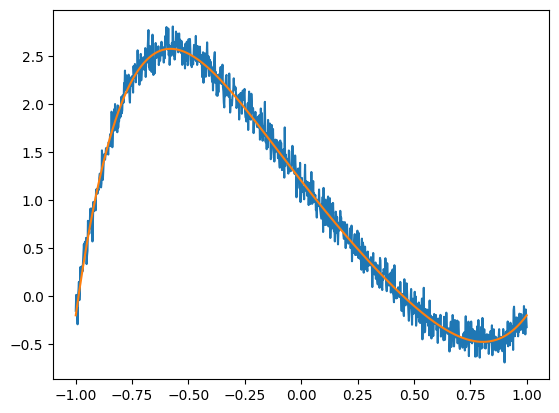

In [13]:
plt.plot(Xdata, Ydata)
plt.plot(Xdata, Ytrue)

In [14]:
# Define polynomial model
def model(Xs, Cs):
    return sum(c * Xs**i for i, c in enumerate(Cs))

# Define the objective function
def chi2(Cs):
    Ymodel = model(Xdata, Cs)
    return jnp.mean((Ymodel - Ydata)**2)

# Parameters for gradient descent
C0    = jnp.zeros(len(groundtruth)) # Start with zeros as initial coefficients
alpha = 0.6                         # Learning rate

Cs = autogd_hist(chi2, C0, alpha)
%timeit -r1 Cs = autogd_hist(chi2, C0, alpha)

print("Optimized coefficients:", Cs[-1])
print("True coefficients:",      groundtruth)
print("Mean Squared Error:",     np.mean((groundtruth - Cs[-1])**2))

274 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Optimized coefficients: [ 1.2243129  -3.0425444   0.12584542  1.145573   -0.78415126  1.8825727
 -0.80202967]
True coefficients: [ 1.2 -3.   0.5  1.  -1.8  2.  -0.1]
Mean Squared Error: 0.24316682


To visualize the fitting process, we plot the history every skip steps.

In [15]:
def mkplot(Xdata, Ydata, Ytrue, Cs, skip=10):
    imax = len(Cs)-1

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,6))
    
    ax0.scatter(Xdata[::skip], Ydata[::skip], color='blue', label='Noisy Data', alpha=0.5)
    for i, Ci in enumerate(Cs[::skip]):
        Yfit = model(Xdata, Ci)
        ax0.plot(Xdata, Yfit, 'r', alpha=skip*i/imax, label='Fitted Polynomial' if skip*i == imax else '')
    ax0.plot(Xdata, Ytrue, 'g--', label='True Polynomial')
    ax0.set_xlabel("x")
    ax0.set_ylabel("y")
    ax0.legend()

    Chi2 = [chi2(Ci) for Ci in Cs]
    ax1.loglog(Chi2, 'o-')
    ax1.set_xlabel('Step')
    ax1.set_ylabel(r'$\chi^2$')

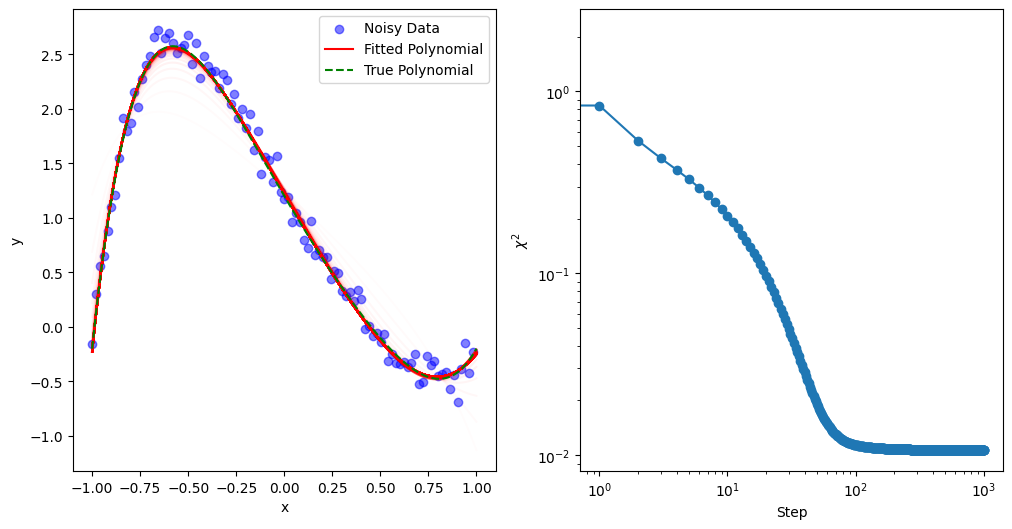

In [16]:
mkplot(Xdata, Ydata, Ytrue, Cs, 10)

### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is a widely used optimization technique, especially valuable for high-dimensional and large-scale datasets.
In traditional gradient descent, each parameter update involves computing the gradient over the entire dataset, which can be computationally intensive.
In contrast, SGD updates parameters based on a randomly selected subset (or "batch") of data points in each iteration.
This approach has several advantages:
1. Efficiency: By using a smaller batch of data, SGD significantly reduces computation time per iteration, allowing faster updates.
2. Memory Management: Processing smaller batches of data at a time is less memory-intensive, making SGD scalable for large datasets.
3. Avoiding Local Minima: The randomness introduced in each update step can help the optimizer escape local minima, as it prevents the algorithm from settling into small dips in the landscape.

SGD is particularly valuable in machine learning, where models have a large number of parameters and datasets are extensive.
For example, in deep learning, SGD enables the efficient training of models with millions of parameters by adjusting weights based on mini-batches, allowing faster convergence with less computational burden.
In scientific research areas like astronomy, SGD is useful for optimizing parameters in models that analyze large survey data. By applying mini-batch SGD, researchers can fit complex models to data efficiently, even in cases with high-dimensional parameter spaces.

In [17]:
p = np.random.permutation(len(Xdata))
Xrand = Xdata[p]
Yrand = Ydata[p]

# Define the batch MSE loss function
def chi2_batch(Cs, Xbatch, Ybatch):
    Ymodel = model(Xbatch, Cs)
    return jnp.mean((Ymodel - Ybatch)**2)

# Function to perform gradient descent with history tracking
def sgd_hist(f, X, alpha, batch_size=1000, imax=1000):
    df = jit(grad(f))  # Use JAX to compute gradient
    Xs = [np.array(X)]
    for i in range(imax):
        j = i % (len(Xdata) // batch_size)
        Xbatch = Xrand[j*batch_size:(j+1)*batch_size]
        Ybatch = Yrand[j*batch_size:(j+1)*batch_size]
        Xs.append(Xs[-1] - alpha * df(Xs[-1], Xbatch, Ybatch))  # Gradient descent update
    return jnp.array(Xs)

In [18]:
# Parameters for gradient descent
C0    = jnp.zeros(len(groundtruth)) # Start with zeros as initial coefficients
alpha = 0.1                         # Learning rate

Cs = sgd_hist(chi2_batch, C0, alpha, 100)
%timeit -r1 Cs = sgd_hist(chi2_batch, C0, alpha, 100)

print("Optimized coefficients:", Cs[-1])
print("True coefficients:",      groundtruth)
print("Mean Squared Error:",     np.mean((groundtruth - Cs[-1])**2))

545 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Optimized coefficients: [ 1.2378086  -3.0205534  -0.01521078  1.0571933  -0.6366029   1.9550064
 -0.79686594]
True coefficients: [ 1.2 -3.   0.5  1.  -1.8  2.  -0.1]
Mean Squared Error: 0.30167207


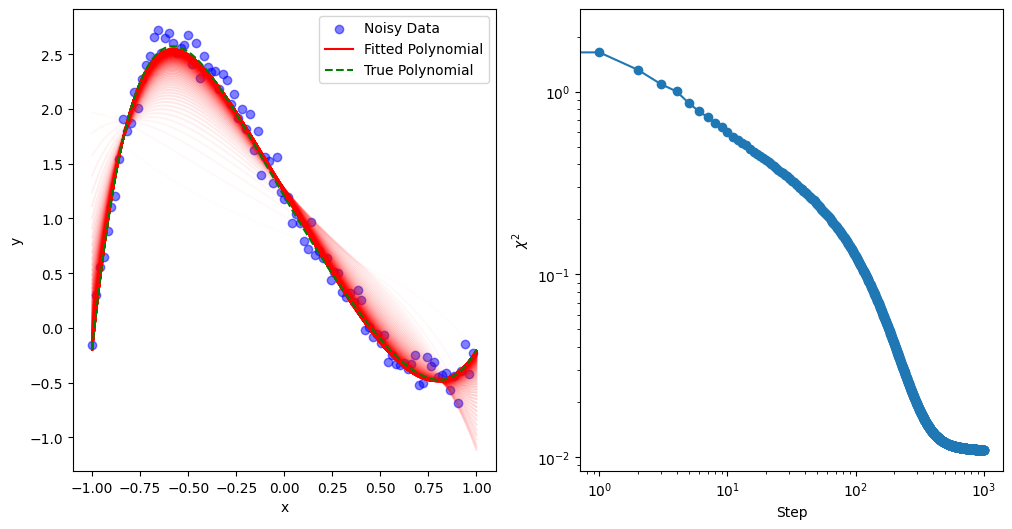

In [21]:
mkplot(Xdata, Ydata, Ytrue, Cs, 10)

### The Adam Optimizer

The Adam optimizer (short for Adaptive Moment Estimation) is a popular optimization algorithm that combines features of both momentum and adaptive learning rates.
Introduced in the paper ["Adam: A Method for Stochastic Optimization" by Kingma and Ba](https://arxiv.org/abs/1412.6980), Adam has since become one of the most widely used optimizers in machine learning and deep learning.
Its efficiency, robustness, and ease of use make it particularly suited for training large neural networks and handling high-dimensional parameter spaces.

Adam builds on two primary ideas:

1. Momentum: Like momentum-based optimization methods, Adam incorporates a moving average of past gradients, which helps smooth the updates and accelerates convergence in directions with consistent gradients.
2. Adaptive Learning Rates: Adam adapts the learning rate for each parameter individually, based on the historical gradient information. This feature allows it to adjust step sizes dynamically, making it more effective on functions with non-uniform gradient scales.

By combining these elements, Adam achieves faster and more stable convergence than traditional stochastic gradient descent (SGD), especially for noisy and sparse data.

The Adam optimizer maintains two moving averages for each parameter:

* First moment ($m$): This tracks the average of the gradients, effectively capturing the direction and smoothing the gradient signal.
* Second moment ($v$): This tracks the average of the squared gradients, allowing the algorithm to adapt the learning rate based on the variance of gradients.

At each iteration $t$, Adam performs the following updates:

1.  Compute the Gradients: Calculate the gradient $g_t$ at the current step.
2.  Update the First Moment (Mean of Gradients):
    \begin{align}
    m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
    \end{align}
3.  Update the Second Moment (Mean of Squared Gradients):
    \begin{align}
    v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
    \end{align}
4.  Bias Correction: To account for initialization bias in the first few steps, Adam applies bias correction to both  $m_t$ and $v_t$:
    \begin{align}
    \hat{m}_t &= \frac{m_t}{1 - \beta_1^t} \\
    \hat{v}_t &= \frac{v_t}{1 - \beta_2^t}
    \end{align}
5.  Parameter Update:
    \begin{align}
    x_{t+1} = x_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
    \end{align}

Here, $\alpha$ is the learning rate, $\epsilon$ is a small constant to prevent division by zero, and $\beta_1$ and  $\beta_2$ are decay rates for the first and second moments, typically set to 0.9 and 0.999, respectively.

In [26]:
# Adam Optimizer
def adam_hist(f, X0, alpha, beta1=0.9, beta2=0.999, epsilon=1e-8, imax=1000):
    df = jit(grad(f))  # Use JAX to compute gradient
    Xs = [X0]
    M  =  0  # Initialize first moment
    V  =  0  # Initialize second moment

    for t in range(1, imax + 1): # use t instead of i to match the formulation
        dfX = df(Xs[-1])  # Compute gradient
        M   = beta1 * M + (1 - beta1) *  dfX      # Update biased first  moment estimate
        V   = beta2 * V + (1 - beta2) * (dfX**2)  # Update biased second moment estimate
        Mdb = M / (1 - beta1**t)  # debias first moment
        Vdb = V / (1 - beta2**t)  # debias second moment
        Xs.append(Xs[-1] - alpha * Mdb / (jnp.sqrt(Vdb) + epsilon))  # Update parameters

    return Xs

In [27]:
# Parameters for gradient descent
C0    = jnp.zeros(len(groundtruth)) # Start with zeros as initial coefficients
alpha = 0.1                         # Learning rate

Cs = adam_hist(chi2, C0, alpha)
%timeit -r1 Cs = adam_hist(chi2, C0, alpha)

print("Optimized coefficients:", Cs[-1])
print("True coefficients:",      groundtruth)
print("Mean Squared Error:",     np.mean((groundtruth - Cs[-1])**2))

972 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Optimized coefficients: [ 1.2161347  -3.0587676   0.28562114  1.2171929  -1.2441856   1.8201628
 -0.4736639 ]
True coefficients: [ 1.2 -3.   0.5  1.  -1.8  2.  -0.1]
Mean Squared Error: 0.0825344


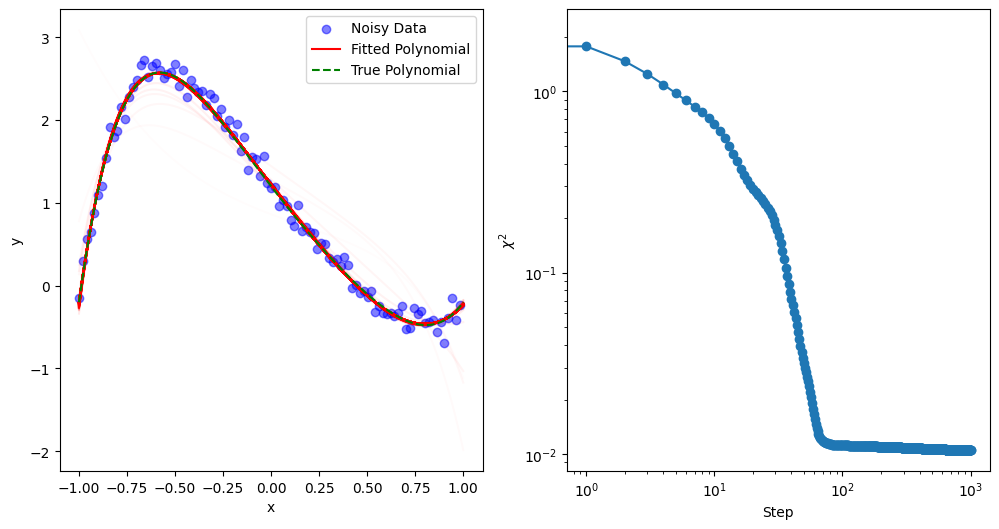

In [28]:
mkplot(Xdata, Ydata, Ytrue, Cs, 10)

```{exercise}
### Program Adam for Stochastic Gradient Descent

Adam combines the strengths of adaptive learning rates and momentum, making it robust and effective for a variety of optimization tasks. Some key advantages include:

* Efficient Parameter Updates: By adapting the learning rate per parameter, Adam handles sparse gradients and complex loss surfaces effectively.
* Faster Convergence: Adam's use of momentum allows it to converge more quickly than standard SGD, particularly in cases with noisy gradients.
* Stable Optimization: The algorithm’s adaptive approach reduces the risk of overshooting or oscillations, leading to more stable convergence.

Adam is widely used in machine learning and deep learning because it combines the benefits of SGD with momentum and adaptive learning rates, making it more robust to the noise and non-convexity typical of high-dimensional models.
Its efficiency and stability have made it the default optimizer in many neural network libraries, enabling practitioners to train models faster and more reliably.
```

## Discussion

Root finding and optimization are foundational tools that enable the analysis, modeling, and solution of complex problems across many fields.
While root finding focuses on solving equations where a function reaches zero, optimization aims to find the extrema of a function.
The concepts are interconnected, as root finding is often used in optimization, and optimization problems can sometimes be reframed as root-finding tasks.

Together, these techniques empower researchers, engineers, and data scientists to solve practical problems, from designing efficient systems to training predictive models.
With a strong understanding of both root finding and optimization, you have the tools to approach a wide range of computational challenges, leveraging the power of numerical analysis to uncover insights and drive innovations.